<a href="https://colab.research.google.com/github/yash-learner/malaria-detection-sdg/blob/main/mini_batch_3_malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 40 kB/s 
     |████████████████████████████████| 449 kB 60.4 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 3.8 MB 14.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ef9e18974b525e441ca4821a8f9c868a51cef8fdbe8776804f6b55c929145f26
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 38.54 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/Malaria-Classification-Using-CNN/malaria-dataset"))

# Any resultensorflow you write to the current directory are saved as output.

['Uninfected', 'Parasitized']


In [ ]:
!pip install np_utils

     |████████████████████████████████| 61 kB 3.2 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=b48de58e17e23a8dbd4631557edde1ae1405e8fbd1a6f566aa46a710faff5f4b
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical as tc

In [ ]:
parasitized_data = os.listdir('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C128P89ThinF_IMG_20151004_130549_cell_146.png', 'C56P17thinF_IMG_20150728_160438_cell_121.png', 'C180P141NThinF_IMG_20151201_170110_cell_9.png', 'C109P70ThinF_IMG_20150930_103214_cell_184.png', 'C130P91ThinF_IMG_20151004_142951_cell_151.png', 'C176P137NThinF_IMG_20151201_122708_cell_128.png', 'C182P143NThinF_IMG_20151201_172216_cell_187.png', 'C99P60ThinF_IMG_20150918_141001_cell_161.png', 'C133P94ThinF_IMG_20151004_155331_cell_123.png', 'C82P43ThinF_IMG_20150817_123500_cell_221.png']


['C49P10thinF_IMG_20150724_103233_cell_184.png', 'C57P18thinF_IMG_20150729_110134_cell_5.png', 'C7NthinF_IMG_20150611_104824_cell_112.png', 'C206ThinF_IMG_20151029_140538_cell_12.png', 'C167P128ReThinF_IMG_20151201_105559_cell_43.png', 'C62P23N_ThinF_IMG_20150818_132811_cell_115.png', 'C125P86ThinF_IMG_20151004_101929_cell_144.png', 'C121P82ThinF_IMG_20151002_134659_cell_52.png', 'C217ThinF_IMG_20151106_141500_cell_98.png', 'C183P144NThinF_IMG_20151201_223431_cell_27.png']


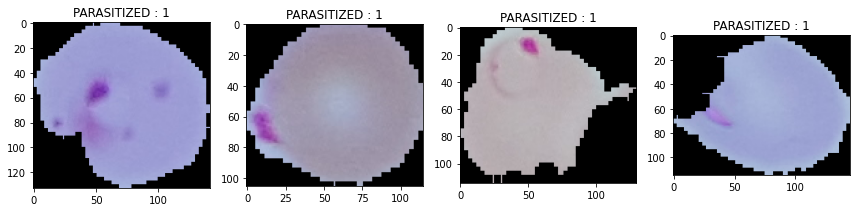

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

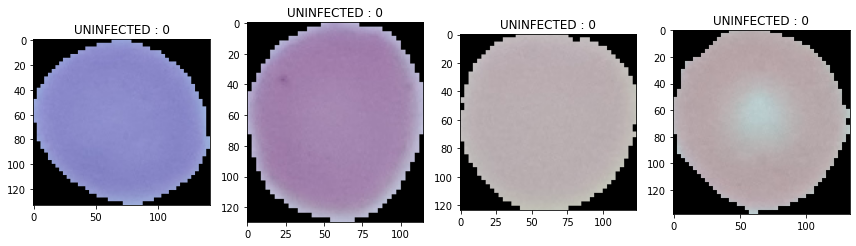

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

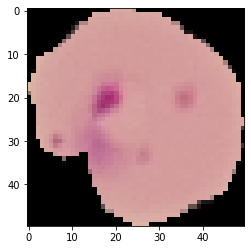

In [ ]:
plt.imshow(data[0])
plt.show()

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [ ]:
y_train = tc(y_train, num_classes = 2)
y_test = tc(y_test, num_classes = 2)

In [ ]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [ ]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [ ]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [ ]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [ ]:
optim = optimizers.SGD(0.01)

In [ ]:
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [ ]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 127s 371ms/step - loss: 0.8321 - accuracy: 0.5699
Epoch 2/50
344/344 [==============================] - 129s 375ms/step - loss: 0.6667 - accuracy: 0.6108
Epoch 3/50
344/344 [==============================] - 131s 380ms/step - loss: 0.6572 - accuracy: 0.6220
Epoch 4/50
344/344 [==============================] - 132s 384ms/step - loss: 0.6472 - accuracy: 0.6392
Epoch 5/50
344/344 [==============================] - 132s 384ms/step - loss: 0.6434 - accuracy: 0.6479
Epoch 6/50
344/344 [==============================] - 132s 384ms/step - loss: 0.6277 - accuracy: 0.6639
Epoch 7/50
344/344 [==============================] - 129s 375ms/step - loss: 0.5676 - accuracy: 0.7169
Epoch 8/50
344/344 [==============================] - 129s 376ms/step - loss: 0.4799 - accuracy: 0.7795
Epoch 9/50
344/344 [==============================] - 130s 379ms/step - loss: 0.4349 - accuracy: 0.8079
Epoch 10/50
344/344 [==============================] - 128s 373m

In [ ]:
history = h_aug
acc = history.history['accuracy']
loss = history.history['loss']

In [ ]:
# len(acc)
len(loss)

50

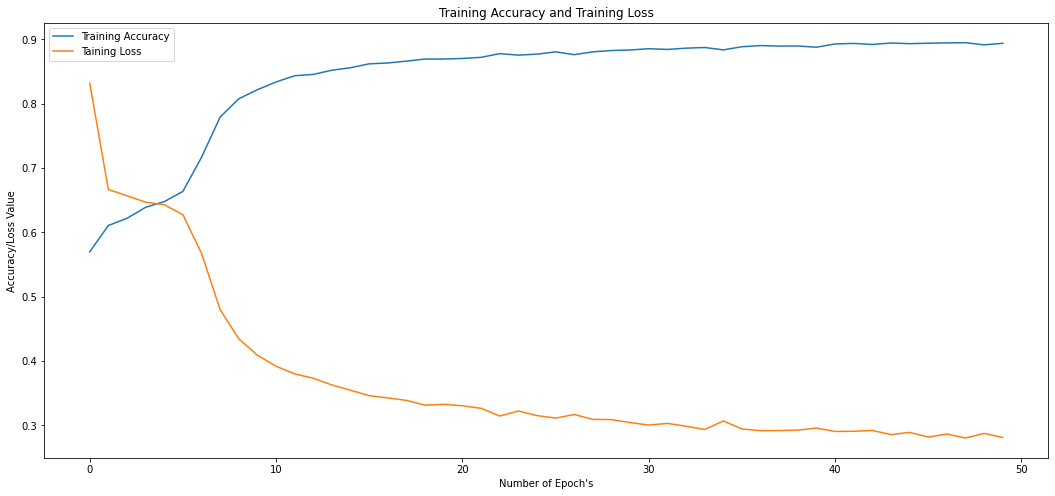

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(range(50), acc, label = 'Training Accuracy')
plt.plot(range(50), loss, label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [ ]:
predict = model_aug.evaluate_generator(val_generator, steps = 5)
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.18364736586809158
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.9468749761581421
